# Assignment 2
### Patrick Adams 1231065

## Part 1:

In [68]:
#importing libraries
import pandas as pd
import numpy as np
import graphviz as viz
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [2]:
#Creating the Data Frame
playtennis = pd.read_csv("playtennis.csv")

In [3]:
playtennis.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
#Using LabelEncoder to transform categorical data
le = playtennis.apply(LabelEncoder().fit_transform)

In [5]:
X = le.drop("play", axis=1)
y = le["play"]

In [6]:
le.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [7]:
#Splitting dataset into trainig set and testing set, 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
#Creating the classifier and training it
clf = DecisionTreeClassifier(criterion='gini')

clf = clf.fit(X_train, y_train)

In [9]:
#Predicitng the response

y_pred = clf.predict(X_test)

In [10]:
#Evaluating the model, looking at accuracy

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6666666666666666


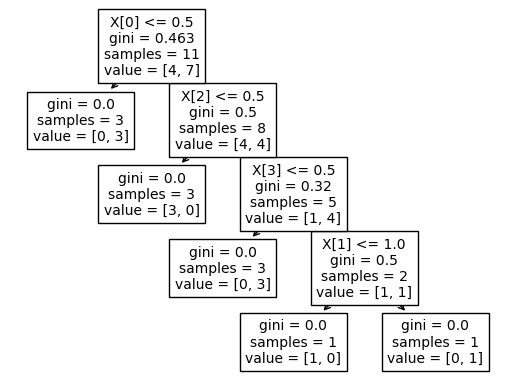

In [11]:
Tree = tree.plot_tree(clf)

In [12]:
fnames = ["Outlook","Temp","Humidity","Windy"]
cnames = ["No", "Yes"]

In [13]:
#Using Graphviz to enhance visualization

dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = fnames,
                               class_names = cnames,
                               special_characters=True,
                               rounded = True, filled = True)

In [14]:
graph = viz.Source(dot_data)

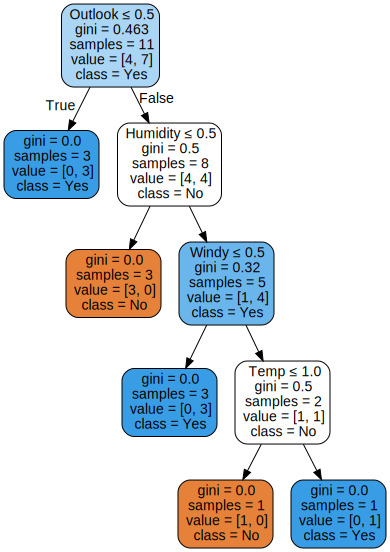

In [15]:
graph

## Part 2:


In [29]:
#Loading the dataset into the dataframe
wine = pd.read_csv("winequality-red.csv")

In [30]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [32]:
#converting the quality column to bad, decent, and excellent bins
converted_quality = wine.loc[:,"quality"]

In [33]:
converted_quality = np.array(sorted(converted_quality.unique()))

In [34]:
converted_quality = pd.cut(wine["quality"], bins=3,
       labels=['bad', 'decent', 'excellent'])
#quality = pd.cut(quality, 3, labels=["Bad", "Decent", "Excellent"])

In [42]:
converted_quality = converted_quality.rename("converted_qual")

In [43]:
wine = pd.concat([wine, converted_quality], axis=1)

In [46]:
wine.drop(["quality"],axis=1,inplace=True)

In [47]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,converted_qual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,decent
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,decent
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,decent
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,decent
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,decent


In [48]:
#Using LabelEncoder to transform categorical data
le_qual = wine.apply(LabelEncoder().fit_transform)

In [49]:
le_qual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,converted_qual
0,27,76,0,10,39,11,28,342,63,18,11,1
1,31,112,0,22,61,25,61,271,32,30,17,1
2,31,88,4,17,55,15,48,287,38,27,17,1
3,65,12,56,10,38,17,54,354,28,20,17,1
4,27,76,0,10,39,11,28,342,63,18,11,1


In [52]:
Xwine = wine.drop("converted_qual", axis=1)
ywine = wine["converted_qual"]

In [53]:
#Splitting dataset into trainig set and testing set, 80-20

Xwine_train, Xwine_test, ywine_train, ywine_test = train_test_split(Xwine, ywine, test_size=0.2, random_state=1)

## Baseline Accuracy using Default Params:

In [60]:
#Creating the classifier
clf_wine_default = RandomForestClassifier()

In [61]:
clf_wine_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
#training the classifier
clf_wine_default = clf_wine_default.fit(Xwine_train, ywine_train)

In [63]:
#Predicitng the response

ywine_pred = clf_wine_default.predict(Xwine_test)

In [64]:
#Evaluating the model, looking at accuracy

print("Accuracy: ", metrics.accuracy_score(ywine_test,ywine_pred))

Accuracy:  0.884375


### With defualt parameters, we are able to achieve an accuracy of 88.43%. Lets see if we can improve that accuracy with hypertuning

In [65]:
#creating classifier
clf_wine_tuned = RandomForestClassifier()

In [177]:
#inputting some numbers to tune the classifier and find a more optimal accuracy

n_estimators = [10, 50, 100, 200, 300, 500]
max_depth = [1,3,5,7,10,15,20, 25, 30]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 5]

para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

In [178]:
#using GridSearch to optimize
gs = GridSearchCV(clf_wine_tuned, para, cv = 5, verbose=2, n_jobs = 2)

In [179]:
#fitting the data
gs.fit(Xwine_train, ywine_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_l

[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total tim

[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total 

[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=

[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   

[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END m

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=20, n_estimators=200; total time=   0

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time

[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s


[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[

[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0

[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] EN

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.1s

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200; to

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s


[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total tim

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=20, n_estimators=10; tota

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=10; to

[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total tim

[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, min_samples_leaf=4, min_samples_split=20, n_estimators=300;

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [1, 3, 5, 7, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 300, 500]},
             verbose=2)

In [180]:
print(gs.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [185]:
#Now that we have the best params to use, lets input those into the classifier
clf_wine_refined = RandomForestClassifier(max_depth = 30, min_samples_leaf = 1,
                                          min_samples_split = 2, n_estimators= 100)

clf_wine_refined.fit(Xwine_train, ywine_train)

ywine_refined_pred = clf_wine_refined.predict(Xwine_test)

In [186]:
#Lets look at the new accuracy
print("Accuracy: ", metrics.accuracy_score(ywine_test,ywine_refined_pred))

Accuracy:  0.88125
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimator

## Any improvement in the accuracy?

    Even with hypertuning the parameters, the best accuracy the model could deliver was, at best, the same as the accuracy of the model with default parameters. With that being said, it should be noted that the time spent may not have even been worth it. It seems that the RandomForestClassifier with defualt parameters is good enough for the dataset we are currenty working with. Will it always be like this? Of course not, however, it is clear that there are datasets where hypertuning is not worth the man-hours. Time is money and in this example hypertuning uses a lot of time that is not necessarily needed.